# assignment 2 for machine learning a question of going down Mt. Fuji

In [1543]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<hr>

**Load Mtfuji data**

<hr>

In [1544]:
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print("300 data of mtfuji_data.csv \n\n{}".format(fuji))

300 data of mtfuji_data.csv 

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


<hr>

**[Problem 1] Visualization of data**

<hr>

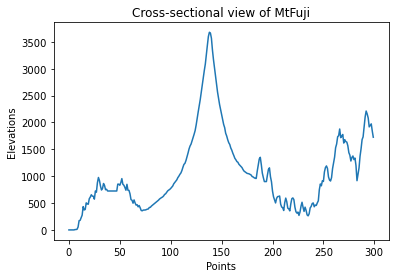

In [1545]:
points = fuji[:,0]
elevations = fuji[:,3]
"""points = points.reshape(len(points),1)
elevations = elevations.reshape(len(elevations),1)"""

plt.title("Cross-sectional view of MtFuji")
plt.xlabel("Points")
plt.ylabel("Elevations")
plt.plot(points, elevations)
plt.show()

<hr>

**[Problem 2] Create a function to calculate the slope of a point**

<hr>

In [1546]:
def slope_mtfuji(n, p, e):
    dp = p[n] - p[n-1] 
    de = e[n] - e[n-1]
    slope = de / dp
    return slope

curr_point = 136

slope = slope_mtfuji(curr_point, points, elevations)

print("The value of current point {} : {}".format(curr_point, slope))


The value of current point 136 : 168.35000000000036


<hr>

**[Problem 3] Create a function to calculate the destination**

<hr>


In [1547]:
def destination_point(n, p, e, hyper_para):
    slop = slope_mtfuji(n, p, e)
    destination = p[n] - hyper_para * slope
    return destination

curr = 136

dest = destination_point(curr, points, elevations, 0.2)

print("Destination of current point {} is : {} ".format(curr,dest))



Destination of current point 136 is : 102.32999999999993 


<hr>

**[Problem 4] Creating a function to go down the mountain**

<hr>

In [1548]:
def go_down(position, p, e, hyper_para):
    lists_position = []
    lists_elevation = []
    lists_position.append(position) 
    lists_elevation.append(e[position])
    i = position
    for i in range(position):
        s = destination_point(lists_position[-1], p,e,hyper_para)
        if s >= 0 and lists_position.count(s) <= 0 and round(s,1) - int(s) < 0.5:
            lists_position.append(round(s))
            lists_elevation.append(e[lists_position[-1]])
        elif s >= 0 and lists_position.count(s) <= 0 and round(s,1) - int(s) > 0.5:
            lists_position.append(round(s) - 1)
            lists_elevation.append(e[lists_position[-1]])
            
    return lists_position,lists_elevation

start = 136

lists_position,lists_elevation = go_down(start, points, elevations, 0.2)

print("Go down list position : \n\n{}\n\n Go down list elevation : \n\n{}".format(lists_position,lists_elevation))


Go down list position : 

[136, 102, 68, 34, 0]

 Go down list elevation : 

[3434.59, 817.62, 429.49, 864.06, 0.0]


<hr>

**[Problem 5] Visualization of the descent process**

<hr>

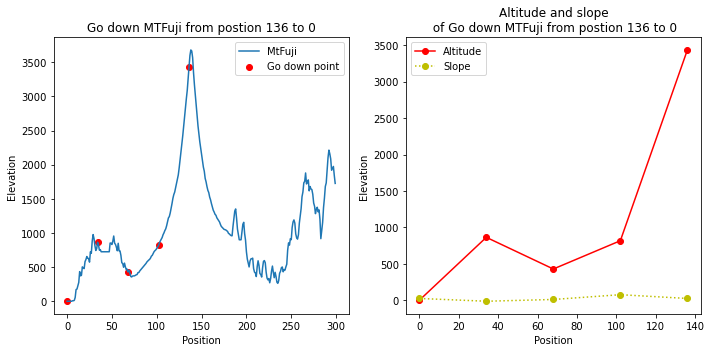

In [1549]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.set_title("Go down MTFuji from postion {} to 0".format(start))
ax1.set_xlabel('Position')
ax1.set_ylabel('Elevation')
ax1.plot(points, elevations)
ax1.scatter(lists_position,lists_elevation, color='r')
ax1.legend(["MtFuji" , "Go down point"])

ax2.set_title("Altitude and slope\n of Go down MTFuji from postion {} to 0".format(start))
ax2.set_xlabel('Position')
ax2.set_ylabel('Elevation')
ax2.plot(lists_position,lists_elevation, 'ro-')
ax2.plot(lists_position,np.array(tuple(slope_mtfuji(k, lists_position, lists_elevation) for k in range(len(lists_position)))), 'yo:')
ax2.legend(["Altitude" , "Slope"])

fig.tight_layout()




<hr>

**[Problem 6] Change of initial value**

<hr>

I random some value for initial value : [88, 136, 73, 135, 106, 143] 




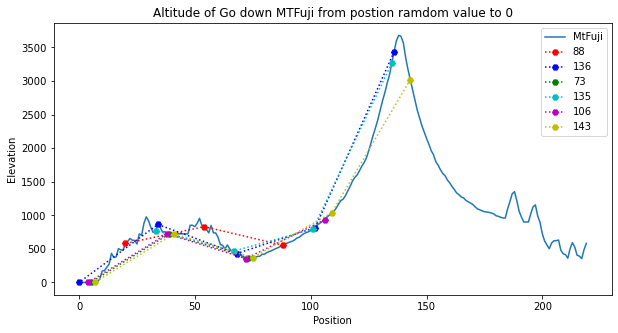

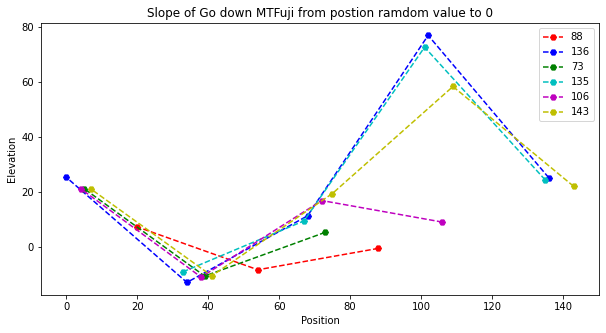

In [1550]:
mean = (100, 140)
cov = [[100, 5], [5, 10]]  
random = np.random.multivariate_normal(mean, cov, 3).reshape(6,1)

random = [int(k)-1  for k in random]

lists_color = ['r', 'b', 'g', 'c' , 'm', 'y']

lists_color = np.array(lists_color).reshape(6,1)

print("I random some value for initial value : {} \n\n".format(random))

a = np.asarray(tuple(go_down(k, points, elevations, 0.2) for k in random),dtype=object)

a = np.concatenate((a, lists_color,np.array(random).reshape(6,1)), axis=1)

plt.figure(figsize=[10,5])
plt.title("Altitude of Go down MTFuji from postion ramdom value to 0")
plt.xlabel('Position')
plt.ylabel('Elevation')
plt.plot(points[:220], elevations[:220],label='MtFuji')
for i in a:
    plt.plot(i[0],i[1], i[2] + 'H:', label=i[3])
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.title("Slope of Go down MTFuji from postion ramdom value to 0")
plt.xlabel('Position')
plt.ylabel('Elevation')
for i in a:
    plt.plot(i[0],np.array(tuple(slope_mtfuji(k, i[0], i[1]) for k in range(len(i[0])))), i[2] + 'H--', label=i[3])
plt.legend()
plt.show()



<hr>

**[Problem 7] (Advance problem) Change hyperparameters**

<hr>

I random some value for hyper parameter value : [0.1, 0.2, 0.4, 0.8] 




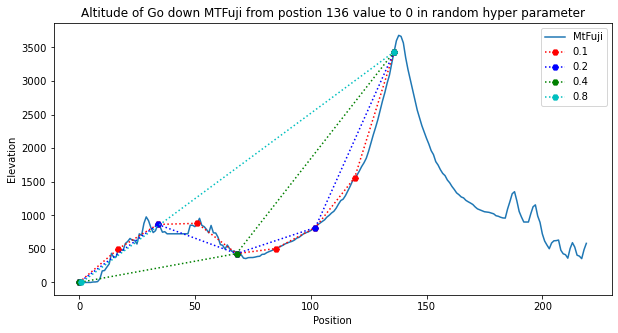

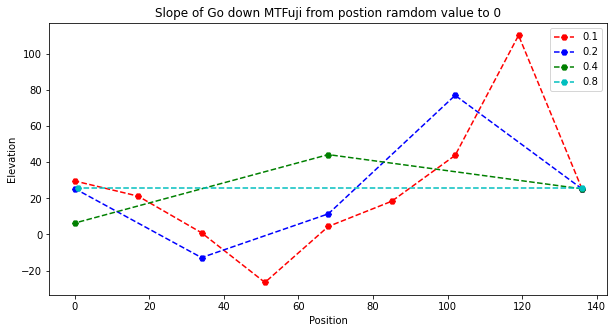

In [1557]:
hyper_r = [0.1, 0.2, 0.4, 0.8]

lists_color = ['r', 'b', 'g' , 'c']

lists_color = np.array(lists_color).reshape(4,1)

print("I random some value for hyper parameter value : {} \n\n".format(hyper_r))

start = 136

a = np.asarray(tuple(go_down(start, points, elevations, k) for k in hyper_r ),dtype=object)

a = np.concatenate((a, lists_color, np.array(hyper_r).reshape(4,1)), axis=1)

plt.figure(figsize=[10,5])
plt.title("Altitude of Go down MTFuji from postion {} value to 0 in random hyper parameter".format(start))
plt.xlabel('Position')
plt.ylabel('Elevation')
plt.plot(points[:220], elevations[:220],label='MtFuji')
for i in a:
    plt.plot(i[0],i[1], i[2] + 'H:', label=i[3])
plt.legend()
plt.show()

plt.figure(figsize=[10,5])
plt.title("Slope of Go down MTFuji from postion ramdom value to 0")
plt.xlabel('Position')
plt.ylabel('Elevation')
for i in a:
    plt.plot(i[0],np.array(tuple(slope_mtfuji(k, i[0], i[1]) for k in range(len(i[0])))), i[2] + 'H--', label=i[3])
plt.legend()
plt.show()
